In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


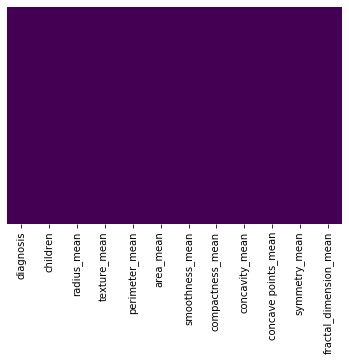

In [2]:
#Check if is there any null data
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [3]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
diagnosis = pd.get_dummies(cancer_data['diagnosis'], drop_first = True)
cancer_data = pd.concat([diagnosis,cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,3,6,7,8,9,10,11,12, 13]]
cancer_data.head()

,M,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Yes
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [4]:
cancer_data = cancer_data.rename(columns = {'Yes':'Child', 'M':'Diagnosis'})
cancer_data.head()

,Diagnosis,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [5]:
X = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:,0]

In [6]:
X.head()

,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 455
Test size    : 114


In [21]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [22]:
X_train

array([[ 1.0449852 ,  0.90312805,  0.52642027, ...,  0.66363209,
        -0.30258962,  1.05189423],
       [ 1.68141074,  1.74602236,  0.28608701, ..., -0.00849186,
        -0.57977321,  1.05189423],
       [-1.44260855, -1.15482615, -1.91696783, ..., -0.08562083,
         0.8359494 , -0.95066592],
       ...,
       [ 0.82638686,  0.7311257 ,  0.78131917, ...,  0.42489954,
         0.32032833,  1.05189423],
       [-0.05077356, -0.16891866, -0.41306428, ..., -1.08095192,
        -0.65130446,  1.05189423],
       [-0.32748032, -0.3886841 , -0.47642487, ..., -1.26459234,
        -0.6095779 , -0.95066592]])

In [23]:
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Prediciting the test set results
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)

end = time.time()

In [31]:
accuracy_all = accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

print("Naive Bayes Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


[[69  3]
 [ 7 35]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Naive Bayes Accuracy: 91.23%
Cross validation score: 90.86% (+/- 6.24%)
Execution time: 0.12833 seconds 



In [38]:
y_test

421    0
47     1
292    0
186    1
414    1
      ..
172    1
3      1
68     0
448    0
442    0
Name: Diagnosis, Length: 114, dtype: uint8

In [39]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=uint8)

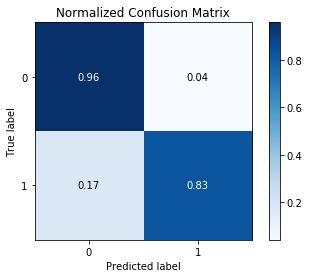

In [55]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

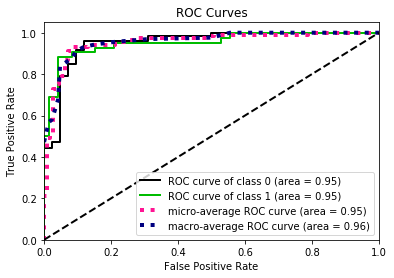

In [57]:
y_probas = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

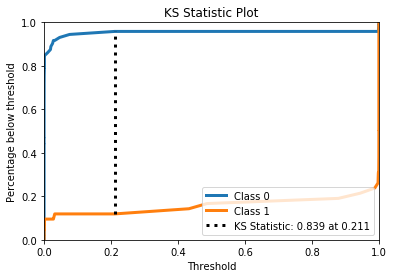

In [58]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)

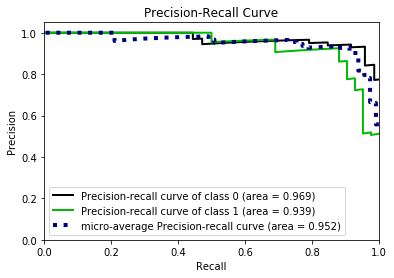

In [59]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

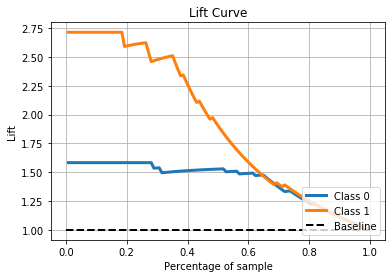

In [60]:
skplt.metrics.plot_lift_curve(y_test, y_probas)

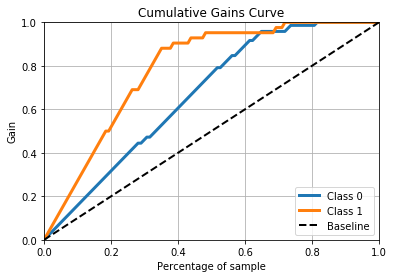

In [61]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

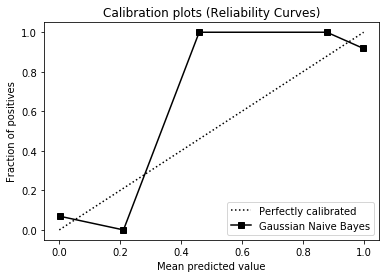

In [67]:
import scikitplot as skplt

nb = GaussianNB()

nb_probas = nb.fit(X_train, y_train).predict_proba(X_test)

probas_list = [nb_probas]
clf_names = ['Gaussian Naive Bayes']
skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names)
plt.show()